In [1]:
#import some useful stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path

# Plots for the availability of SMD data and software

Plot the number of sampled publications that are compliant with NASA Science Mission Directorates Policies on the sharing of data and software.  This is based on an anonymized sample of thirty papers per each division. 

See Michelson, R, Paseka, R, Crawford, S. 2024. Monitoring Implementation of the NASA Science Mission Directorate Scientific Information Policy for NASA’s Research Opportunities for Earth and Space Science. OSF Registries. https://doi.org/10.17605/OSF.IO/43U8W 

 


In [2]:
#read in the full dataset
myfile = "data_software_anon_sample.csv"
mega = pd.read_csv(myfile, header=1)

In [3]:
#filter by division
apd = mega[mega["SMD division"]=="APD"]
psd = mega[mega["SMD division"]=="PSD"]
bps = mega[mega["SMD division"]=="BPS"]
esd = mega[mega["SMD division"]=="ESD"]
hpd = mega[mega["SMD division"]=="HPD"]


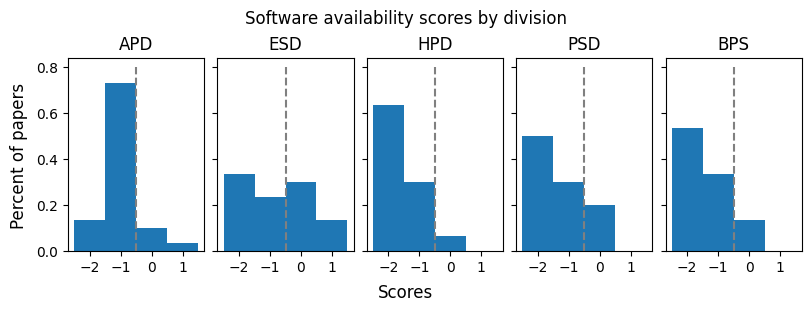

In [4]:
#plot software availability histogram

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(8,3), sharey=True,layout="constrained")
ax1.hist(apd["Software availability score"],range=(-2.5,1.5), bins=4, density=True)
ax2.hist(esd["Software availability score"],range=(-2.5,1.5), bins=4, density=True)
ax3.hist(hpd["Software availability score"],range=(-2.5,1.5), bins=4, density=True)
ax4.hist(psd["Software availability score"],range=(-2.5,1.5), bins=4, density=True)
ax5.hist(bps["Software availability score"],range=(-2.5,1.5), bins=4, density=True)

ax1.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax2.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax3.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax4.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax5.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")

ax1.set_title("APD")
ax2.set_title("ESD")
ax3.set_title("HPD")
ax4.set_title("PSD")
ax5.set_title("BPS")

ax1.set_xticks([-2,-1,0,1])
ax2.set_xticks([-2,-1,0,1])
ax3.set_xticks([-2,-1,0,1])
ax4.set_xticks([-2,-1,0,1])
ax5.set_xticks([-2,-1,0,1])

fig.suptitle("Software availability scores by division")
fig.supxlabel("Scores")
fig.supylabel("Percent of papers")
plt.show()

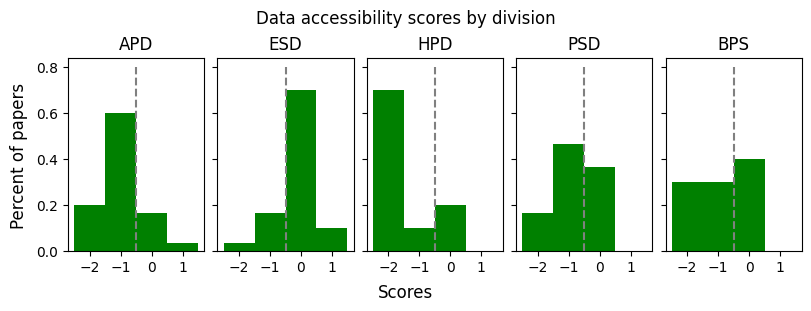

In [5]:
#plot data accessibility histogram
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(8,3), sharey=True,layout="constrained")

ax1.hist(apd["Data accessibility score"],color="green",range=(-2.5,1.5), bins=4, density=True)
ax2.hist(esd["Data accessibility score"],color="green",range=(-2.5,1.5), bins=4, density=True)
ax3.hist(hpd["Data accessibility score"],color="green",range=(-2.5,1.5), bins=4, density=True)
ax4.hist(psd["Data accessibility score"],color="green",range=(-2.5,1.5), bins=4, density=True)
ax5.hist(bps["Data accessibility score"],color="green",range=(-2.5,1.5), bins=4, density=True)

ax1.set_title("APD")
ax2.set_title("ESD")
ax3.set_title("HPD")
ax4.set_title("PSD")
ax5.set_title("BPS")

ax1.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax2.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax3.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax4.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")
ax5.vlines(-0.5,0, 0.8, colors = "grey",linestyles="dashed")

ax1.set_xticks([-2,-1,0,1])
ax2.set_xticks([-2,-1,0,1])
ax3.set_xticks([-2,-1,0,1])
ax4.set_xticks([-2,-1,0,1])
ax5.set_xticks([-2,-1,0,1])
#SMD added
#ax6.set_xticks([-2,-1,0,1])
fig.suptitle("Data accessibility scores by division")
fig.supxlabel("Scores")
fig.supylabel("Percent of papers")
plt.show()

In [56]:
#write a function to take a dataframe, iterate over both score columns, and return 
#the percentages of papers that have each score
def calc_percents(df):
    '''
    This function takes the individual evaluation spreadsheetsand calculates the percentage of papers that scored compliant
    '''
    df = df.reset_index()
    software_ntwo = 0
    software_none = 0
    software_zero = 0
    software_one = 0
    data_ntwo = 0
    data_none = 0
    data_zero = 0
    data_one = 0
    for i in range(30):
        if df["Software availability score"][i]==-2:
            software_ntwo += 1
        elif df["Software availability score"][i]==-1:
            software_none += 1
        elif df["Software availability score"][i]==0:
            software_zero += 1
        elif df["Software availability score"][i]==1:
            software_one += 1
        else:
            print("Unknown score encountered at row {x}".format(x=i))
    for i in range(30):
        if df["Data accessibility score"][i]==-2:
            data_ntwo += 1
        elif df["Data accessibility score"][i]==-1:
            data_none += 1
        elif df["Data accessibility score"][i]==0:
            data_zero += 1
        elif df["Data accessibility score"][i]==1:
            data_one += 1
        else:
            print("Unknown score encountered at row {x}".format(x=i))
    data_perc = (data_zero+data_one)/30 *100
    soft_perc = (software_zero+software_one)/30 * 100
    return round(data_perc,2), round(soft_perc,2)
    

In [57]:
#create a table with compliance perccentages
d = {"Division": ["APD","ESD","HPD","PSD","BPS"], 
     "% Compliant (Data)": [calc_percents(apd)[0], calc_percents(esd)[0],calc_percents(hpd)[0] , calc_percents(psd)[0],calc_percents(bps)[0]],
    "% Compliant (Software)": [calc_percents(apd)[1], calc_percents(esd)[1],calc_percents(hpd)[1] , calc_percents(psd)[1],calc_percents(bps)[1]]}
compliance_table = pd.DataFrame(d)

In [58]:
compliance_table

,Division,% Compliant (Data),% Compliant (Software)
0,APD,20.00,13.33
1,ESD,80.00,43.33
2,HPD,20.00,6.67
3,PSD,36.67,20.00
4,BPS,40.00,13.33


In [59]:
# write out the data for data availability 
data_list = []

for n, x in zip(["APD", "ESD", "HPD", "PSD", "BPS"],[apd, esd, hpd, psd, bps]):
    h = np.histogram(x['Data accessibility score'], bins=4, range=(-2.25,1.25))[0]
    h_list = h.tolist()
    h_list.insert(0, n)
    data_list.append(h_list)
    
    print(h_list)
df = pd.DataFrame(data_list, columns=['Division', 'None', 'Non-Compliant', 'Compliant', 'Exceeds'])
df.to_csv("data_availability.csv", index=False)

['APD', 6, 18, 5, 1]
['ESD', 1, 5, 21, 3]
['HPD', 21, 3, 6, 0]
['PSD', 5, 14, 11, 0]
['BPS', 9, 9, 12, 0]


In [60]:
# write out the data for software availability 
software_list = []

for n, x in zip(["APD", "ESD", "HPD", "PSD", "BPS"],[apd, esd, hpd, psd, bps]):
    h = np.histogram(x['Software availability score'], bins=4, range=(-2.25,1.25))[0]
    h_list = h.tolist()
    h_list.insert(0, n)
    software_list.append(h_list)
    
    print(h_list)
df = pd.DataFrame(software_list, columns=['Division', 'None', 'Non-Compliant', 'Compliant', 'Exceeds'])
df.to_csv("software_availability.csv", index=False)

['APD', 4, 22, 3, 1]
['ESD', 10, 7, 9, 4]
['HPD', 19, 9, 2, 0]
['PSD', 15, 9, 6, 0]
['BPS', 16, 10, 4, 0]


# Estimate of Errors

Esimate the errors associated with the measurements.  The errors will likely be an underestimate due to other factors that could contribute to the measurement, but they provide some estimate for the uncertainty. 

In [61]:
def pop_error(percent, sample, Z=1):
    """
    Calculate the error from sampling an population
   
    percent: Percentage with a certain classifictaion
    sample: Number of samples taken
    Z: z-value for level of confidence
   
    Source: https://en.wikipedia.org/wiki/Population_proportion
    """
    n_o = sample
   
    return Z * (percent * ( 1 - percent) / n_o)**0.5


In [62]:
def error_sampling_estimate(percent, sample, total, niter=100):
    """Determing a samping error given a percent, total sample, and number of samples
   
    percent: Percentage with a certain classifictaion
    sample: Number of samples taken
    total: Total number of samples
    niter: Number of times for iteration
   
    """
    repro_arr = (np.random.uniform(0,1,total) < percent)
    x = np.zeros(niter)
    for j in range(0,niter):
        rid = np.random.randint(0,total, sample)
        x[j] = repro_arr[rid].sum()/sample
    return x.mean(), x.mean() - percent, x.std()

In [63]:
sample = 30.0
for d in data_list:
    label, _, _, c, f = d
    p = (c+f) / sample
    print(label, "Error:", pop_error((c+f)/sample, sample, 1)) 
    

APD Error: 0.07302967433402216
ESD Error: 0.07302967433402215
HPD Error: 0.07302967433402216
PSD Error: 0.08798147953257401
BPS Error: 0.08944271909999159


In [64]:
# This is a approximate estimate of the number of papers for each division
# APD
print("APD Error:", error_sampling_estimate(0.2, 30, 1500, niter=100)[2])
# ESD
print("ESD Error:", error_sampling_estimate(0.8, 30, 1500, niter=100)[2])
# HPD
print("HPD Error:", error_sampling_estimate(0.2, 30, 200, niter=100)[2])
# PSD
print("PSD Error:", error_sampling_estimate(0.37, 30, 500, niter=100)[2])
# BPS
print("BPS Error:", error_sampling_estimate(0.4, 30, 100, niter=100)[2])

APD Error: 0.06637519617045712
ESD Error: 0.06874348453974871
HPD Error: 0.077381450547847
PSD Error: 0.08133538248784747
BPS Error: 0.07764520447379722
